# Lecture 1: Introduction and Data Science Basics


(Based on the Jupyter notebook by Marek Rei)

This session will cover how to load data in common formats into python, plot it and calculate basic statistics over it. 

## Python Syntax Refresher

Here is a short python program just to remind you about the python syntax. 

This short code snippet imports a library called *random*, creates a list with three elements, then goes through the list and prints each element along with a random number.

In [1]:
import random

my_list = ["camel", "elephant", "crocodile"]
for word in my_list:
    print(word + " " + str(random.random()))

camel 0.7467977293676846
elephant 0.2801734390246857
crocodile 0.8800502244316697


If you need help with getting started with Python, there are a couple of useful tutorials online, e.g.:

- https://www.tutorialspoint.com/python/index.htm
- https://www.learnpython.org
- https://www.codecademy.com/learn/learn-python-3

## Dataset

We will use the data/country-stats.csv (the repository actually presents data in a number of different formats) file which contains demographic information for 161 countries, collected by The World Bank. Each line includes the following values:

* Country	Name
* GDP per Capita (PPP USD)
* Population Density (persons per sq km)
* Population Growth Rate (%)
* Urban Population (%)
* Life Expectancy at Birth (avg years)
* Fertility Rate (births per woman)
* Infant Mortality (deaths per 1000 births)
* Enrolment Rate, Tertiary (%)
* Unemployment, Total (%)
* Estimated Control of Corruption (scale -2.5 to 2.5)
* Estimated Government Effectiveness (scale -2.5 to 2.5)
* Internet Users (%)

A sample of the CSV (comma-separated values) format can be seen below. Values are separated by commas; the first row contains column headers.

~~~~
Country Name,GDP per Capita (PPP USD),Population Density (persons per sq km),Population Growth Rate (%),Urban Population (%),Life Expectancy at Birth (avg years),Fertility Rate (births per woman),Infant Mortality (deaths per 1000 births),"Enrolment Rate, Tertiary (%)","Unemployment, Total (%)",Estimated Control of Corruption (scale -2.5 to 2.5),Estimated Government Effectiveness (scale -2.5 to 2.5),Internet Users (%)
Afghanistan,1560.67,44.62,2.44,23.86,60.07,5.39,71,3.33,8.5,-1.41,-1.4,5.45
Albania,9403.43,115.11,0.26,54.45,77.16,1.75,15,54.85,14.2,-0.72,-0.28,54.66
Algeria,8515.35,15.86,1.89,73.71,70.75,2.83,25.6,31.46,10,-0.54,-0.55,15.23
Antigua and Barbuda,19640.35,200.35,1.03,29.87,75.5,2.12,9.2,14.37,8.4,1.29,0.48,83.79
Argentina,12016.2,14.88,0.88,92.64,75.84,2.2,12.7,74.83,7.2,-0.49,-0.25,55.8
~~~~

## Reading Data into Python

We can use the python library called `pandas` in order to easily load CSV files into our code. The *data* variable will be a `pandas`-specific object containing the whole dataset. *data.head()* shows the first few lines.

In [2]:
import pandas as pd

data = pd.read_csv('data/country-stats.csv')
data.head()

,Country Name,GDP per Capita (PPP USD),Population Density (persons per sq km),Population Growth Rate (%),Urban Population (%),Life Expectancy at Birth (avg years),Fertility Rate (births per woman),Infant Mortality (deaths per 1000 births),"Enrolment Rate, Tertiary (%)","Unemployment, Total (%)",Estimated Control of Corruption (scale -2.5 to 2.5),Estimated Government Effectiveness (scale -2.5 to 2.5),Internet Users (%)
0,Afghanistan,1560.67,44.62,2.44,23.86,60.07,5.39,71.0,3.33,8.5,-1.41,-1.40,5.45
1,Albania,9403.43,115.11,0.26,54.45,77.16,1.75,15.0,54.85,14.2,-0.72,-0.28,54.66
2,Algeria,8515.35,15.86,1.89,73.71,70.75,2.83,25.6,31.46,10.0,-0.54,-0.55,15.23
3,Antigua and Barbuda,19640.35,200.35,1.03,29.87,75.50,2.12,9.2,14.37,8.4,1.29,0.48,83.79
4,Argentina,12016.20,14.88,0.88,92.64,75.84,2.20,12.7,74.83,7.2,-0.49,-0.25,55.80


## Using *Pandas* to Analyze Data

Now that we have loaded the data, we can analyze it.  

To start, we'll focus on one variable in this dataset: GDP per Capita (PPP USD).

It is common to describe a variable by finding its average value (the mean), so let's do that first.

In [3]:
data["GDP per Capita (PPP USD)"].mean()

15616.289378881987

Now we know that the average GDP in those countries is $15616. But on its own that doesn't really tell us much. As data scientists, we want to find interesting connections and patterns. 

What if we look at how the average GDP differs between countries with low and high unemployment? We can use `pandas` to first select countries that have a specific unemployment percentage (e.g., 7\%) and then calculate the mean over that group.

In [4]:
low_unemployment_countries = data[data["Unemployment, Total (%)"] < 7]
low_unemployment_countries["GDP per Capita (PPP USD)"].mean()

16383.713421052631

In [5]:
high_unemployment_countries = data[data["Unemployment, Total (%)"] >= 7]
high_unemployment_countries["GDP per Capita (PPP USD)"].mean()

14930.122

Now we're getting somewhere! There's a difference in average GDP between these two groups. Countries with higher unemployment rate have lower GDP.  

Let's plot this finding using another helpful library, `matplotlib`.

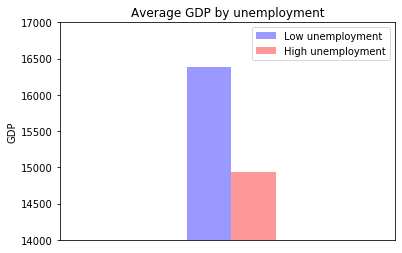

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

bar_width = 0.6

x1 = [0.0]
x2 = [bar_width]

y1 = [data[data["Unemployment, Total (%)"] < 7]["GDP per Capita (PPP USD)"].mean()]
y2 = [data[data["Unemployment, Total (%)"] >= 7]["GDP per Capita (PPP USD)"].mean()]

fig, ax = plt.subplots()
bars1 = ax.bar(x1, y1, bar_width, alpha=0.4, color='b', label='Low unemployment')
bars2 = ax.bar(x2, y2, bar_width, alpha=0.4, color='r', label='High unemployment')

ax.set_ylabel('GDP')
ax.set_title('Average GDP by unemployment')
ax.set_xticks([])
ax.set_xlim([-2,2.5])
ax.set_ylim([14000,17000])
ax.legend()

plt.show()

This clearly looks like a big difference in GDP between the two countries, right?

Well, there are actually a couple of problems with this plot. First of all, a lot depends on how the information is presented. If we adjust the Y axis to show the whole range of values, the same difference will not look as substantial any more.

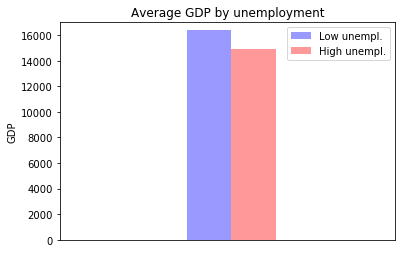

In [7]:
bar_width = 0.6

x1 = [0.0]
x2 = [bar_width]

y1 = [data[data["Unemployment, Total (%)"] < 7]["GDP per Capita (PPP USD)"].mean()]
y2 = [data[data["Unemployment, Total (%)"] >= 7]["GDP per Capita (PPP USD)"].mean()]

fig, ax = plt.subplots()
bars1 = ax.bar(x1, y1, bar_width, alpha=0.4, color='b', label='Low unempl.')
bars2 = ax.bar(x2, y2, bar_width, alpha=0.4, color='r', label='High unempl.')

ax.set_ylabel('GDP')
ax.set_title('Average GDP by unemployment')
ax.set_xticks([])
ax.set_xlim([-2,2.5])
ax.set_ylim([0, 17000])
ax.legend()

plt.show()

That doesn't look like a very big difference any more. The way we present data is a powerful tool and we have to be careful not to let it fool ourselves (or others).

The second problem is that taking the average of some data throws away a lot of important information. Let's calculate the standard deviation of these groups as well.

In [8]:
low_unemployment_countries = data[data["Unemployment, Total (%)"] < 7]
low_unemployment_countries["GDP per Capita (PPP USD)"].std()

19752.9126477805

In [9]:
high_unemployment_countries = data[data["Unemployment, Total (%)"] >= 7]
high_unemployment_countries["GDP per Capita (PPP USD)"].std()

12781.059320722152

For both subgroups, the standard deviation is almost just as high as the average GDP. This means there is so much variance in the data that the difference in averages hardly matters.

We can plot the data to take a better look at the relationships between these two variables.

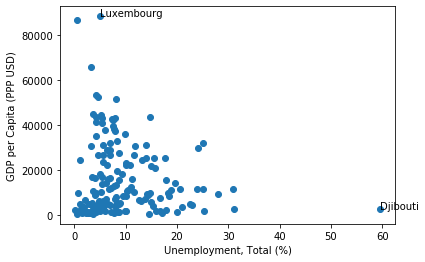

In [10]:
plt.scatter(data["Unemployment, Total (%)"], data["GDP per Capita (PPP USD)"])
plt.xlabel("Unemployment, Total (%)")
plt.ylabel("GDP per Capita (PPP USD)")
for i in [37,84]:
    plt.annotate(data["Country Name"][i], (data["Unemployment, Total (%)"][i], data["GDP per Capita (PPP USD)"][i]))

#fig.set_size_inches(5,5)
plt.savefig('graph3.png', dpi=400)
    
plt.show()

We can see that there are some countries with very low unemployment and very high GDP, and some countries with very high unemployment and very low GDP (following our original intuition about the data). But there are also many countries with low unemloyment and low GDP, so our original assumption doesn't really hold and is not actually supported by the data.

## Doing More with Pandas

Here are some other useful things you can do with the `pandas` DataFrame object. If you call it on a dataset without any filters, it will calculate the mean value for all the columns.

In [11]:
data.mean()

GDP per Capita (PPP USD)                                  15616.289379
Population Density (persons per sq km)                      150.002360
Population Growth Rate (%)                                    1.339441
Urban Population (%)                                         56.351429
Life Expectancy at Birth (avg years)                         70.730683
Fertility Rate (births per woman)                             2.786398
Infant Mortality (deaths per 1000 births)                    24.203727
Enrolment Rate, Tertiary (%)                                 34.376149
Unemployment, Total (%)                                       9.334161
Estimated Control of Corruption (scale -2.5 to 2.5)           0.007143
Estimated Government Effectiveness (scale -2.5 to 2.5)        0.047826
Internet Users (%)                                           41.998137
dtype: float64

Similarly, you can use it to calculate statistics such as the median, minimum and maximum:

In [20]:
data.median()
data.min()
data.max()

Country Name                                               Zambia
GDP per Capita (PPP USD)                                    88286
Population Density (persons per sq km)                    1701.01
Population Growth Rate (%)                                   7.05
Urban Population (%)                                        98.89
Life Expectancy at Birth (avg years)                         82.7
Fertility Rate (births per woman)                            7.01
Infant Mortality (deaths per 1000 births)                   117.4
Enrolment Rate, Tertiary (%)                                100.8
Unemployment, Total (%)                                      59.5
Estimated Control of Corruption (scale -2.5 to 2.5)          2.42
Estimated Government Effectiveness (scale -2.5 to 2.5)       2.21
Internet Users (%)                                             96
dtype: object

You can get index using row/column numbers as well. Here is row number 2:

In [15]:
data.iloc[2,:]

Country Name                                              Algeria
GDP per Capita (PPP USD)                                  8515.35
Population Density (persons per sq km)                      15.86
Population Growth Rate (%)                                   1.89
Urban Population (%)                                        73.71
Life Expectancy at Birth (avg years)                        70.75
Fertility Rate (births per woman)                            2.83
Infant Mortality (deaths per 1000 births)                    25.6
Enrolment Rate, Tertiary (%)                                31.46
Unemployment, Total (%)                                        10
Estimated Control of Corruption (scale -2.5 to 2.5)         -0.54
Estimated Government Effectiveness (scale -2.5 to 2.5)      -0.55
Internet Users (%)                                          15.23
Name: 2, dtype: object

Column number 4:

In [21]:
data.iloc[:,4].head()

0    23.86
1    54.45
2    73.71
3    29.87
4    92.64
Name: Urban Population (%), dtype: float64

Element in row 2 column 4:

In [22]:
data.iloc[2,4]

73.71

The *.describe()* function prints a bunch of different statistics at once for all the fields:

In [23]:
data.describe()

,GDP per Capita (PPP USD),Population Density (persons per sq km),Population Growth Rate (%),Urban Population (%),Life Expectancy at Birth (avg years),Fertility Rate (births per woman),Infant Mortality (deaths per 1000 births),"Enrolment Rate, Tertiary (%)","Unemployment, Total (%)",Estimated Control of Corruption (scale -2.5 to 2.5),Estimated Government Effectiveness (scale -2.5 to 2.5),Internet Users (%)
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,15616.289379,150.002360,1.339441,56.351429,70.730683,2.786398,24.203727,34.376149,9.334161,0.007143,0.047826,41.998137
std,16406.926234,228.164746,1.152827,23.219885,8.800197,1.405951,23.111558,26.913834,7.650916,0.977855,0.923518,28.954284
min,551.270000,1.770000,-1.600000,11.210000,47.780000,1.230000,1.700000,0.810000,0.200000,-1.560000,-1.650000,0.800000
25%,2925.650000,36.520000,0.450000,36.340000,65.960000,1.790000,6.700000,10.410000,4.200000,-0.690000,-0.640000,13.940000
50%,9637.080000,79.760000,1.250000,56.730000,73.450000,2.250000,14.900000,26.790000,7.200000,-0.300000,-0.070000,41.440000
75%,24590.490000,175.350000,2.170000,74.000000,76.760000,3.460000,38.500000,58.810000,12.700000,0.640000,0.760000,65.000000
max,88286.000000,1701.010000,7.050000,98.890000,82.700000,7.010000,117.400000,100.800000,59.500000,2.420000,2.210000,96.000000


Also, the *.corr()* function will automatically calculate correlations between all the columns:

In [24]:
data.corr()

,GDP per Capita (PPP USD),Population Density (persons per sq km),Population Growth Rate (%),Urban Population (%),Life Expectancy at Birth (avg years),Fertility Rate (births per woman),Infant Mortality (deaths per 1000 births),"Enrolment Rate, Tertiary (%)","Unemployment, Total (%)",Estimated Control of Corruption (scale -2.5 to 2.5),Estimated Government Effectiveness (scale -2.5 to 2.5),Internet Users (%)
GDP per Capita (PPP USD),1.000000,0.072246,-0.153124,0.639128,0.643584,-0.525951,-0.585671,0.537171,-0.106848,0.759963,0.785839,0.821155
Population Density (persons per sq km),0.072246,1.000000,-0.054785,0.020564,0.174552,-0.168728,-0.129753,-0.027875,-0.124238,0.094788,0.135485,0.146083
Population Growth Rate (%),-0.153124,-0.054785,1.000000,-0.259166,-0.537366,0.736531,0.570344,-0.622351,-0.222239,-0.320934,-0.449213,-0.483063
Urban Population (%),0.639128,0.020564,-0.259166,1.000000,0.649894,-0.553745,-0.578359,0.637276,0.029592,0.499966,0.566198,0.689482
Life Expectancy at Birth (avg years),0.643584,0.174552,-0.537366,0.649894,1.000000,-0.827674,-0.923773,0.699675,-0.062751,0.634365,0.742861,0.798286
Fertility Rate (births per woman),-0.525951,-0.168728,0.736531,-0.553745,-0.827674,1.000000,0.840303,-0.655466,-0.096186,-0.505364,-0.644172,-0.735775
Infant Mortality (deaths per 1000 births),-0.585671,-0.129753,0.570344,-0.578359,-0.923773,0.840303,1.000000,-0.678646,0.032240,-0.589090,-0.719287,-0.780018
"Enrolment Rate, Tertiary (%)",0.537171,-0.027875,-0.622351,0.637276,0.699675,-0.655466,-0.678646,1.000000,-0.016625,0.511104,0.634909,0.708241
"Unemployment, Total (%)",-0.106848,-0.124238,-0.222239,0.029592,-0.062751,-0.096186,0.032240,-0.016625,1.000000,-0.011560,-0.071048,-0.018211
Estimated Control of Corruption (scale -2.5 to 2.5),0.759963,0.094788,-0.320934,0.499966,0.634365,-0.505364,-0.589090,0.511104,-0.011560,1.000000,0.922517,0.779799
